In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./Dataset/processed_dataset.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [3]:
### shape of the dataset
df.shape

(1000, 24)

In [4]:
### info about the dataset
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [5]:
X = df.drop(['Level'], axis='columns')
y = df.Level

In [6]:
X.shape

(1000, 23)

In [7]:
y.shape

(1000,)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
len(X_train)+len(X_test)

1000

In [9]:
### Scalling the data

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Train Acc => ',lr.score(X_train, y_train)*100)
print('Test Acc => ',lr.score(X_test, y_test)*100)

Train Acc =>  99.5
Test Acc =>  99.5


c:\Users\goura\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

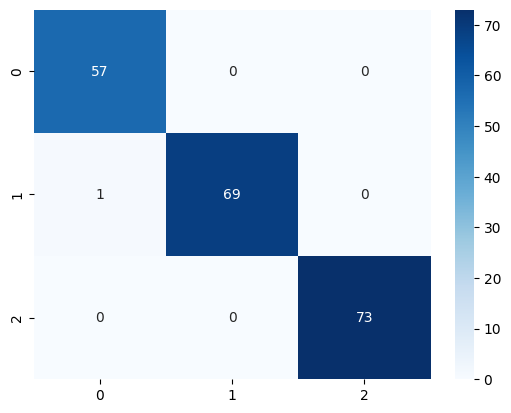

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.99      0.99        70
           2       1.00      1.00      1.00        73

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [13]:
# Get the predicted probabilities for each class
predicted_probabilities = lr.predict_proba(X_test)[:, ]
predicted_probabilities.shape
# fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

#Let's Compute the Area Under the Curve (AUC)
# auc_score = auc(fpr, tpr)

(200, 3)

In [14]:
classes =  df['Level'].unique()
classes

array([0, 1, 2], dtype=int64)

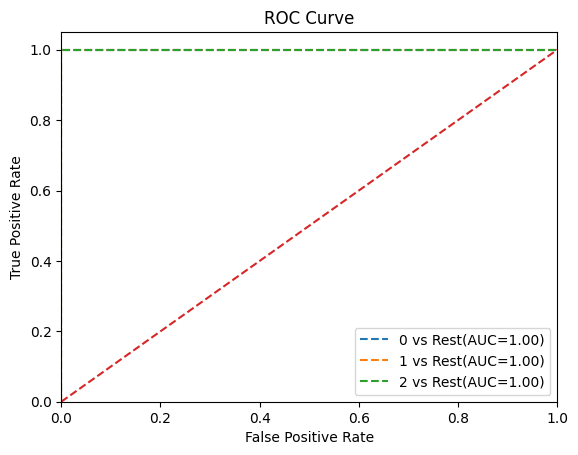

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {}
threshold = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test_binarized[:,i], predicted_probabilities[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i],tpr[i], linestyle='--', label= '%s vs Rest(AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
    
plt.plot([0,1],[0,1],'--')
plt.xlim([0,1])
plt.ylim([0,1.05])
 
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [16]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./lc-lr.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(lr, file)

In [17]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./lc-lr.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(lr, file)